#### Laboratorio 2

##### Javier Valle 20159
##### Mario de León 19029

In [161]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.optimizers import RMSprop, Adagrad, Adam

##### Analizando el dataset.

In [74]:
# Importando el dataset.
dataset = "dataset.csv"

# Cargando el dataset.
df = pd.read_csv(dataset)

# Imprimiendo el dataset.
df

# Imprimiendo los títulos del dataset.
df.columns

# Objetivo de la red: Clasificación.

# Posibles variables a utilizar para clasificar: 
# 1. Production budget $
# 2. Worldwide gross $
# 3. Domestic gross $


Index(['movie_title', 'production_date', 'genres', 'runtime_minutes',
       'director_name', 'director_professions', 'director_birthYear',
       'director_deathYear', 'movie_averageRating', 'movie_numerOfVotes',
       'approval_Index', 'Production budget $', 'Domestic gross $',
       'Worldwide gross $'],
      dtype='object')

##### Imprimiendo las columnas elegidas del dataset.

In [75]:
# Imprimiedo las columnas a utilizar (movie_averageRating, movie_numerOfVotes y approval_Index).

# Seleccionamos las columnas que queremos combinar
selected_columns = ['Production budget $', 'Worldwide gross $', 'Domestic gross $']

# Utilizamos la función concat() para combinar las columnas en una sola variable
combined_variable = pd.concat([df[col] for col in selected_columns], axis=1)

# Renombramos las columnas del nuevo DataFrame resultante
combined_variable.columns = ['movie_averageRating', 'movie_numerOfVotes', 'approval_Index']

# Ahora 'combined_variable' contiene todas las columnas seleccionadas combinadas en una sola variable
print(combined_variable)

      movie_averageRating  movie_numerOfVotes  approval_Index
0               460000000          2265935552       667830256
1               400000000          2794731755       858373000
2               379000000          1045713802       241071802
3               365000000          1395316979       459005868
4               300000000          2048359754       678815482
...                   ...                 ...             ...
4375                65000            22233808        11529368
4376                50000            10426506        10426506
4377                50000             2335352         2335352
4378                50000              424149          391674
4379                50000                8374            8374

[4380 rows x 3 columns]


##### Creando one-hot encoding - movie_title

In [76]:
# label -> one-hot encoding
label = pd.get_dummies(df['movie_title'], prefix='movie_title')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['movie_title'], axis=1, inplace=True)

##### Creando un X y un Y para el entrenamiento.

In [77]:
# En la variable X se necesitaría meter esto 'Production budget $', 'Worldwide gross $', 'Domestic gross $'

X = df[['movie_averageRating', 'movie_numerOfVotes', 'approval_Index']]

# En el eje y sería esto 'movie_averageRating', 'movie_numerOfVotes', 'approval_Index'.
Y = df[['Production budget $', 'Worldwide gross $', 'Domestic gross $']]

##### Entrenando la primera red.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.2, 
    )

# Verificando los resultados.
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (3504, 3)
X_test:  (876, 3)
y_train:  (3504, 3)
y_test:  (876, 3)


##### Creando la red

In [79]:
# Nueva arquitectura ajustada
batched_model = Sequential([
    Dense(128, input_shape=(3,), activation="relu"),   # Aumentamos el número de neuronas a 128
    BatchNormalization(),
    Dense(256, activation='relu'),                      # Aumentamos el número de neuronas a 256
    BatchNormalization(),
    Dense(256, activation='relu'),                      # Aumentamos el número de neuronas a 256
    BatchNormalization(),
    Dense(128, activation='relu'),                      # Ajustamos las neuronas a 128
    BatchNormalization(),
    Dense(64, activation='relu'),                       # Ajustamos las neuronas a 64
    BatchNormalization(),
    Dense(3, activation='softmax')
])

In [80]:
# Compilar el modelo con RMSprop como optimizador
batched_model.compile(
    optimizer=RMSprop(), 
    loss='mean_squared_error', 
    metrics=['accuracy']
)

##### Viendo los resultados de la red neuronal.

In [93]:
batched_history =  batched_model.fit(
    X_train, 
    y_train,
    epochs=100, 
    validation_split=0.75,
    batch_size=500,
    verbose=2
)

Epoch 1/100
2/2 - 0s - loss: 16714700603523072.0000 - accuracy: 0.7112 - val_loss: 24749169222615040.0000 - val_accuracy: 0.2728 - 147ms/epoch - 74ms/step
Epoch 2/100
2/2 - 0s - loss: 16714699529781248.0000 - accuracy: 0.7158 - val_loss: 24749169222615040.0000 - val_accuracy: 0.7108 - 91ms/epoch - 45ms/step
Epoch 3/100
2/2 - 0s - loss: 16714699529781248.0000 - accuracy: 0.7215 - val_loss: 24749169222615040.0000 - val_accuracy: 0.7253 - 85ms/epoch - 42ms/step
Epoch 4/100
2/2 - 0s - loss: 16714699529781248.0000 - accuracy: 0.7066 - val_loss: 24749169222615040.0000 - val_accuracy: 0.2717 - 100ms/epoch - 50ms/step
Epoch 5/100
2/2 - 0s - loss: 16714699529781248.0000 - accuracy: 0.6986 - val_loss: 24749169222615040.0000 - val_accuracy: 0.7283 - 129ms/epoch - 65ms/step
Epoch 6/100
2/2 - 0s - loss: 16714699529781248.0000 - accuracy: 0.6986 - val_loss: 24749169222615040.0000 - val_accuracy: 0.7283 - 115ms/epoch - 58ms/step
Epoch 7/100
2/2 - 0s - loss: 16714700603523072.0000 - accuracy: 0.6998 -

##### Graficando los resultados

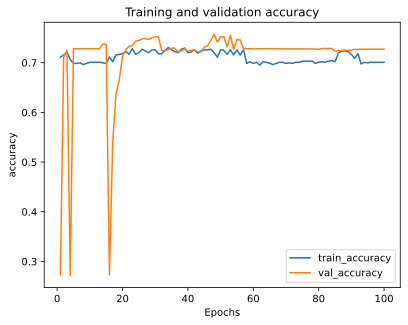

In [94]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_metric(batched_history, 'accuracy')
#plot_metric(batched_history, 'loss')
# batched_model.evaluate(X_test, y_test, verbose=2)

#### Entrenando la segunda red

##### Creando la segunda red

In [121]:
# Nueva arquitectura ajustada con Leaky ReLU y Linear
batched_model = Sequential([
    Dense(128, input_shape=(3,)),
    LeakyReLU(alpha=1),               # Leaky ReLU con alpha=0.1 (valor típico)
    BatchNormalization(),
    Dense(256),
    LeakyReLU(alpha=1),
    BatchNormalization(),
    Dense(256),
    LeakyReLU(alpha=1),
    BatchNormalization(),
    Dense(128),
    LeakyReLU(alpha=1),
    BatchNormalization(),
    Dense(64),
    LeakyReLU(alpha=1),
    BatchNormalization(),
    Dense(3, activation='linear')       # Capa de salida con Linear (para regresión)
])

In [132]:
# Función de pérdida Pseudo-Huber
def pseudo_huber_loss(y_true, y_pred, delta=1.0):
    y_true = tf.cast(y_true, dtype=tf.float32)
    error = y_true - y_pred
    delta_sq = delta ** 2
    return tf.reduce_mean(delta_sq * (tf.sqrt(1 + (error / delta_sq) ** 2) - 1))

In [141]:
# Función de pérdida Pseudo-Huber
def pseudo_huber_loss(y_true, y_pred, delta=1.0):
    y_true = tf.cast(y_true, dtype=tf.float32)
    error = y_true - y_pred
    delta_sq = delta ** 2
    return tf.reduce_mean(delta_sq * (tf.sqrt(1 + (error / delta_sq) ** 2) - 1))

# Compilar el modelo con Adagrad como optimizador y Pseudo-Huber Loss como función de pérdida
batched_model.compile(
    optimizer=Adagrad(),
    loss=pseudo_huber_loss,
    metrics=['accuracy']
)

# Entrenar el modelo
batched_history =  batched_model.fit(
    X_train, 
    y_train,
    epochs=200, 
    validation_split=0.25,
    batch_size=300,
    verbose=2
)

Epoch 1/200
9/9 - 3s - loss: 68095960.0000 - accuracy: 0.0677 - val_loss: 72382320.0000 - val_accuracy: 0.0742 - 3s/epoch - 385ms/step
Epoch 2/200
9/9 - 0s - loss: 68095968.0000 - accuracy: 0.0670 - val_loss: 72382320.0000 - val_accuracy: 0.0742 - 191ms/epoch - 21ms/step
Epoch 3/200
9/9 - 0s - loss: 68095960.0000 - accuracy: 0.0658 - val_loss: 72382320.0000 - val_accuracy: 0.0753 - 188ms/epoch - 21ms/step
Epoch 4/200
9/9 - 0s - loss: 68095968.0000 - accuracy: 0.0651 - val_loss: 72382320.0000 - val_accuracy: 0.0742 - 182ms/epoch - 20ms/step
Epoch 5/200
9/9 - 0s - loss: 68095968.0000 - accuracy: 0.0677 - val_loss: 72382320.0000 - val_accuracy: 0.0742 - 195ms/epoch - 22ms/step
Epoch 6/200
9/9 - 0s - loss: 68095976.0000 - accuracy: 0.0696 - val_loss: 72382320.0000 - val_accuracy: 0.0742 - 184ms/epoch - 20ms/step
Epoch 7/200
9/9 - 0s - loss: 68095968.0000 - accuracy: 0.0689 - val_loss: 72382320.0000 - val_accuracy: 0.0753 - 188ms/epoch - 21ms/step
Epoch 8/200
9/9 - 0s - loss: 68095968.0000 

##### Graficando

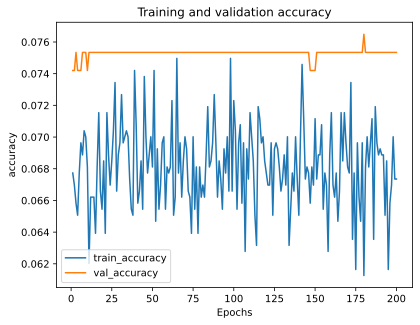

In [142]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_metric(batched_history, 'accuracy')
#plot_metric(batched_history, 'loss')
# batched_model.evaluate(X_test, y_test, verbose=2)

#### Entrenando una tercera red

##### Creando la tercera red

In [187]:
# Nueva arquitectura ajustada con ReLU y Linear (capa de salida)
batched_model = Sequential([
    Dense(128, input_shape=(3,)),
    Activation('relu'),                # Usando ReLU como activación en la capa oculta.
    BatchNormalization(),
    Dense(256),
    Activation('relu'),                # Usando ReLU como activación en la capa oculta.
    BatchNormalization(),
    Dense(256),
    Activation('relu'),                # Usando ReLU como activación en la capa oculta.
    BatchNormalization(),
    Dense(128),
    Activation('relu'),                # Usando ReLU como activación en la capa oculta.
    BatchNormalization(),
    Dense(64),
    Activation('relu'),                # Usando ReLU como activación en la capa oculta.
    BatchNormalization(),
    Dense(3, activation='linear')       # Capa de salida con 'linear' para regresión.
])

In [190]:
batched_model.compile(
    optimizer=Adam(),
    loss=pseudo_huber_loss,
    metrics=['accuracy']
)

In [193]:
# Entrenar el modelo
batched_history =  batched_model.fit(
    X_train, 
    y_train,
    epochs=100,
    validation_split=0.25,
    batch_size=100,
    verbose=2
)

Epoch 1/100


27/27 - 0s - loss: 68088080.0000 - accuracy: 0.5925 - val_loss: 75103608.0000 - val_accuracy: 0.2306 - 419ms/epoch - 16ms/step
Epoch 2/100
27/27 - 0s - loss: 68088040.0000 - accuracy: 0.4989 - val_loss: 73670928.0000 - val_accuracy: 0.4463 - 373ms/epoch - 14ms/step
Epoch 3/100
27/27 - 0s - loss: 68087992.0000 - accuracy: 0.4878 - val_loss: 72747712.0000 - val_accuracy: 0.5959 - 402ms/epoch - 15ms/step
Epoch 4/100
27/27 - 0s - loss: 68087960.0000 - accuracy: 0.4893 - val_loss: 89952648.0000 - val_accuracy: 0.2546 - 368ms/epoch - 14ms/step
Epoch 5/100
27/27 - 0s - loss: 68087896.0000 - accuracy: 0.5940 - val_loss: 74503448.0000 - val_accuracy: 0.4098 - 362ms/epoch - 13ms/step
Epoch 6/100
27/27 - 0s - loss: 68087864.0000 - accuracy: 0.5662 - val_loss: 72489408.0000 - val_accuracy: 0.4715 - 370ms/epoch - 14ms/step
Epoch 7/100
27/27 - 0s - loss: 68087824.0000 - accuracy: 0.4456 - val_loss: 72442944.0000 - val_accuracy: 0.5263 - 356ms/epoch - 13ms/step
Epoch 8/100
27/27 - 0s - loss: 68087776

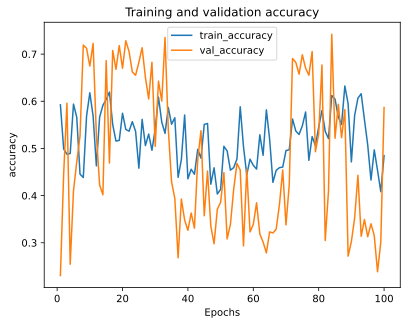

In [194]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_metric(batched_history, 'accuracy')
#plot_metric(batched_history, 'loss')
# batched_model.evaluate(X_test, y_test, verbose=2)